### Lecture 4 of Computational Aspectes of Machine Learning: course 2021-2022

Credits: Armen Yeritsyan

If you have questions about this notebook contact Melissa Lopez at m.lopez@uu.nl

In this example we code our own NN (see SimpleNN.py for details). Here we give a training set and a test set. For details about the procedure read SimpleNN.pdf.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleNN as nn

MUST be Nx8 Matrix (number of testsets/rows N is variable. Just add or delete rows in this matrix)

In [3]:
testset_input = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                          [0, 1, 0, 0, 0, 0, 0, 0],
                          [0, 0, 1, 0, 0, 0, 0, 0],
                          [0, 0, 0, 1, 0, 0, 0, 0],
                          [0, 0, 0, 0, 1, 0, 0, 0],
                          [0, 0, 0, 0, 0, 1, 0, 0],
                          [0, 0, 0, 0, 0, 0, 1, 0],
                          [0, 0, 0, 0, 0, 0, 0, 1],
                          [0, 0, 1, 0, 0, 0, 0, 0],
                          [0, 1, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 1, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 1, 0],
                          [1, 0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0, 1],
                          [0, 0, 0, 1, 0, 0, 0, 0],])

MUST bet 8x8 matrix! You can change the order and the values of the rows, but can't change the number of the rows!

In [4]:
training_inputs = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                            [0, 1, 0, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 0, 0],
                            [0, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 0, 1, 0, 0],
                            [0, 0, 0, 0, 0, 0, 1, 0],
                            [0, 0, 0, 0, 0, 0, 0, 1],])

In this case the outputs are the same as the inputs

In [5]:
training_outputs = training_inputs

We want to see the influence of different learning rates $\alpha$ and weight decays $\lambda$ across different layers, so we loop over some values.

In [29]:
alphas = np.arange(0.0, 1, 0.1)
lambdas = 0.0001

Run number 0
Run number 1
Run number 2
Run number 3
Run number 4
Run number 5
Run number 6
Run number 7
Run number 8
Run number 9


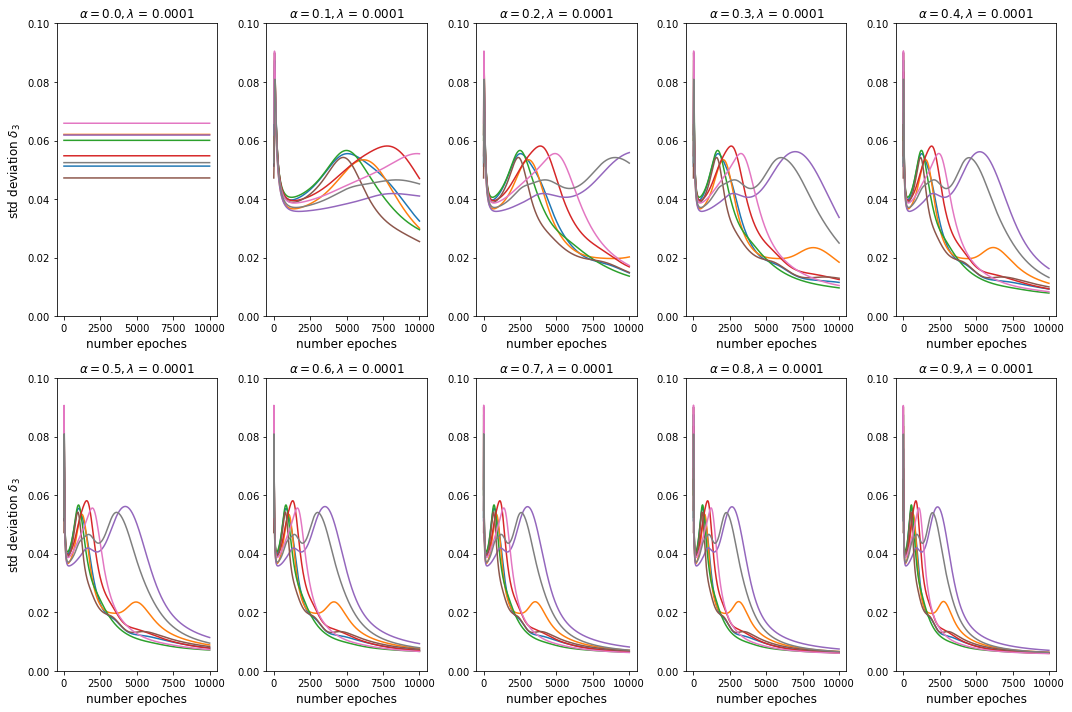

In [30]:
fig, axs = plt.subplots(2, 5, figsize=(15,10))
axs = axs.ravel()

for c, par_alpha in enumerate(alphas):
    
    print('Run number ' + str(c))
    
    simple_nn = nn.SimpleNN(par_alpha, lambdas)

    # run the training routine
    simple_nn.trainNN(training_inputs, training_outputs, 10000)

    # plot standard deviation of the errors in layer 3 of all 8 test sets for this iteration
    axs[c].set_title(r'$\alpha = ' + str(np.round(par_alpha,2)) + ', \lambda$ = ' + str(np.round(0.0001,4)))

    for i in range(8):
        axs[c].plot(simple_nn.std_d3_CompleteRun[:,i])
        axs[c].set_ylim(0, 0.1)
        axs[c].set_xlabel('number epoches', fontsize=12)
        
        if (c == 0) or (c == 5):
            axs[c].set_ylabel(r'std deviation $\delta_3$', fontsize=12)
plt.tight_layout()
plt.show()


Now we visualise our layers

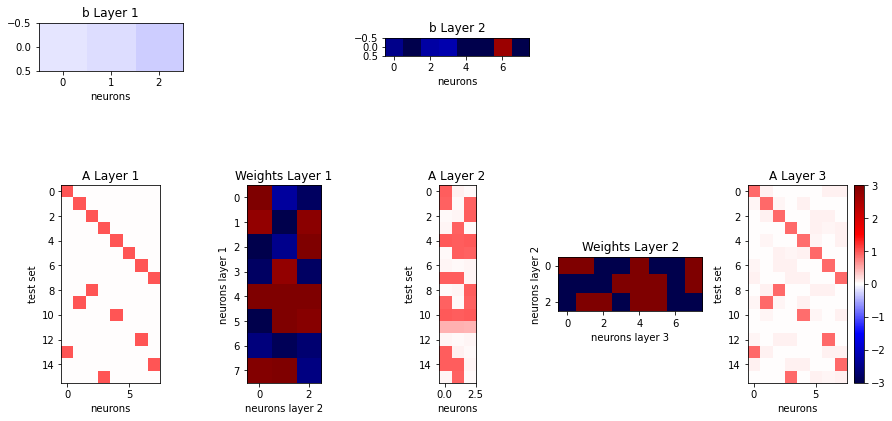

In [33]:
y = simple_nn.predict(testset_input, True);

We compare the input test and the predicted output

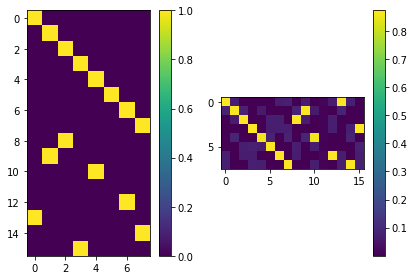

In [34]:
# Input
plt.subplot(1,2,1)
plt.imshow(testset_input)
plt.colorbar()

# Predictions
plt.subplot(1,2,2)
plt.imshow(y)
plt.colorbar()
plt.tight_layout()